In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np

In [3]:
# Path to your .npz file in Google Drive
npz_file_path1 = '/content/drive/My Drive/CVTask/train_cifar100_nl_images.npz'

# Load the .npz file
data1 = np.load(npz_file_path1, allow_pickle=True)
train_images = data1['images']

In [4]:
print(f'Loaded {len(train_images)} images from {npz_file_path1}')
print(train_images[0].shape)
print(train_images[0])

Loaded 49999 images from /content/drive/My Drive/CVTask/train_cifar100_nl_images.npz
(3, 224, 224)
[[[255 255 255 ... 234 234 234]
  [255 255 255 ... 234 234 234]
  [255 255 255 ... 234 234 234]
  ...
  [255 255 255 ... 253 253 253]
  [255 255 255 ... 253 253 253]
  [255 255 255 ... 253 253 253]]

 [[255 255 255 ... 194 194 194]
  [255 255 255 ... 194 194 194]
  [255 255 255 ... 194 194 194]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[199 199 199 ... 138 138 138]
  [199 199 199 ... 138 138 138]
  [199 199 199 ... 138 138 138]
  ...
  [255 255 255 ... 253 253 253]
  [255 255 255 ... 253 253 253]
  [255 255 255 ... 253 253 253]]]


In [5]:
import torch

In [6]:
train_images = torch.from_numpy(train_images)

In [7]:
print(train_images.size())
print(train_images[0].size())
print(train_images[0][0].size())

torch.Size([49999, 3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([224, 224])


In [8]:
# Path to your .npz file in Google Drive
npz_file_path2 = '/content/drive/My Drive/CVTask/test_cifar100_nl_images.npz'

# Load the .npz file
data2 = np.load(npz_file_path2, allow_pickle=True)
test_images = data2['images']

print(f'Loaded {len(test_images)} images from {npz_file_path2}')
print(test_images[0].shape)

test_images = torch.from_numpy(test_images)

print(test_images.size())
print(test_images[0].size())
print(test_images[0][0].size())

Loaded 9999 images from /content/drive/My Drive/CVTask/test_cifar100_nl_images.npz
(3, 224, 224)
torch.Size([9999, 3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([224, 224])


In [9]:
def cifar100_labels_to_tensor(labels):
    # List of CIFAR-100 fine labels
    label_list = [
        'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
        'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
        'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
        'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
        'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
        'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
        'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
        'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
        'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
        'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
    ]

    # Create a mapping from string labels to numerical labels
    label_to_num = {label: num for num, label in enumerate(label_list)}

    # Convert the numpy array of string labels to numerical labels
    numerical_labels = np.array([label_to_num[label] for label in labels])

    # Convert the numerical labels to a PyTorch tensor
    tensor_labels = torch.tensor(numerical_labels, dtype=torch.long)

    return tensor_labels

In [10]:
simple_labels = np.array(['apple', 'bear', 'camel', 'dolphin'])
simple_tensor_labels = cifar100_labels_to_tensor(simple_labels)
print(f"The tensor corresponding to the labels {simple_labels} is {simple_tensor_labels}.")

The tensor corresponding to the labels ['apple' 'bear' 'camel' 'dolphin'] is tensor([ 0,  3, 15, 30]).


In [11]:
import pandas as pd

train_data = pd.read_csv('/content/drive/MyDrive/CVTask/dataset/cifar100_nl/data/cifar100_nl.csv', header=None)
train_labels = train_data.iloc[:49999, 1].values
train_labels = cifar100_labels_to_tensor(train_labels)

print(train_labels.size())
print(train_labels[0])

torch.Size([49999])
tensor(24)


In [12]:
test_data = pd.read_csv('/content/drive/MyDrive/CVTask/dataset/cifar100_nl/data/cifar100_nl_test.csv', header=None)
test_labels = test_data.iloc[:49999, 1].values
test_labels = cifar100_labels_to_tensor(test_labels)

print(test_labels.size())
print(test_labels[0])

torch.Size([9999])
tensor(33)


In [13]:
import os
from torch.utils.data import Dataset, DataLoader

class CustomImageDataset(Dataset):
    def __init__(self, images, labels, transform=None, target_transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        one_image = self.images[idx] / 255.0
        one_label = self.labels[idx]

        if self.transform:
            one_image = self.transform(one_image)
        if self.target_transform:
            one_label = self.target_transform(one_label)
        return one_image, one_label, idx

In [14]:
from torchvision import transforms, models

transform_img = transforms.Compose([

    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),

])

'''
#for AlexNet
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
'''

'\n#for AlexNet\ntransform_img = transforms.Compose([\n    transforms.ToPILImage(),\n    transforms.Resize(256),\n    transforms.CenterCrop(224),\n    transforms.ToTensor(),\n    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),\n])\n'

In [15]:
from torchvision import transforms, models

#for AlexNet
transform_img = transforms.Compose([

    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),

])

'''
#for AlexNet
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
'''

'\n#for AlexNet\ntransform_img = transforms.Compose([\n    transforms.ToPILImage(),\n    transforms.Resize(256),\n    transforms.CenterCrop(224),\n    transforms.ToTensor(),\n    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),\n])\n'

In [16]:
train_dataset = CustomImageDataset(train_images, train_labels, transform=transform_img)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = CustomImageDataset(test_images, test_labels, transform=transform_img)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [17]:
print(len(train_dataset))
print(len(test_dataset))

49999
9999


In [18]:
#print(train_dataset[0].dtype)  # Should be torch.float32
#print(train_dataset[0].max(), train_dataset[0])  # Should be within [0.0, 1.0]
print(train_dataset[0][0].size())
print(train_dataset[0])

torch.Size([3, 224, 224])
(tensor([[[2.2489, 2.2489, 2.2489,  ..., 1.8893, 1.8893, 1.8893],
         [2.2489, 2.2489, 2.2489,  ..., 1.8893, 1.8893, 1.8893],
         [2.2489, 2.2489, 2.2489,  ..., 1.8893, 1.8893, 1.8893],
         ...,
         [2.2489, 2.2489, 2.2489,  ..., 2.2147, 2.2147, 2.2147],
         [2.2489, 2.2489, 2.2489,  ..., 2.2147, 2.2147, 2.2147],
         [2.2489, 2.2489, 2.2489,  ..., 2.2147, 2.2147, 2.2147]],

        [[2.4286, 2.4286, 2.4286,  ..., 1.3606, 1.3606, 1.3606],
         [2.4286, 2.4286, 2.4286,  ..., 1.3606, 1.3606, 1.3606],
         [2.4286, 2.4286, 2.4286,  ..., 1.3606, 1.3606, 1.3606],
         ...,
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286]],

        [[1.6640, 1.6640, 1.6640,  ..., 0.6008, 0.6008, 0.6008],
         [1.6640, 1.6640, 1.6640,  ..., 0.6008, 0.6008, 0.6008],
         [1.6640, 1.6640, 1.664

In [19]:
import torch.nn as nn
import torch.nn.functional as F

class elr_loss(nn.Module):
    def __init__(self, num_examp, num_classes=100, llambda = 3, beta=0.7):
         r"""Early Learning Regularization.
         Parameters
         * `num_examp` Total number of training examples.
         * `num_classes` Number of classes in the classification problem.
         * `lambda` Regularization strength; must be a positive float, controling the strength of the ELR.
         * `beta` Temporal ensembling momentum for target estimation.
         """

         super(elr_loss, self).__init__()
         self.num_classes = num_classes
         self.USE_CUDA = torch.cuda.is_available()
         self.target = torch.zeros(num_examp, self.num_classes).cuda() if self.USE_CUDA else torch.zeros(num_examp, self.num_classes)
         self.beta = beta
         self.llambda = llambda



    def forward(self, index, output, label):
        r"""Early Learning Regularization.
         Args
         * `index` Training sample index, due to training set shuffling, index is used to track training examples in different iterations.
         * `output` Model's logits, same as PyTorch provided loss functions.
         * `label` Labels, same as PyTorch provided loss functions.
         """

        y_pred = F.softmax(output,dim=1)
        y_pred = torch.clamp(y_pred, 1e-4, 1.0-1e-4)
        y_pred_ = y_pred.data.detach()
        self.target[index] = self.beta * self.target[index] + (1-self.beta) * ((y_pred_)/(y_pred_).sum(dim=1,keepdim=True))
        ce_loss = F.cross_entropy(output, label)
        elr_reg = ((1-(self.target[index] * y_pred).sum(dim=1)).log()).mean()
        final_loss = ce_loss +  self.llambda *elr_reg
        return  final_loss

In [20]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#model = models.alexnet(pretrained=True)
#model.classifier[6] = nn.Linear(model.classifier[6].in_features, 100)

model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 100)  # Assuming 100 classes for CIFAR-100
model = model.to(device)

criterion_train = elr_loss(49999)
criterion_test = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [21]:
from tqdm import tqdm

In [22]:
def train(model, dataloader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    with tqdm(dataloader) as progress:
      for images, labels, indexs in progress:

        optimizer.zero_grad()
        images = images.to(device)
        labels = labels.to(device)
        #indexs = indexs.to(device)
        outputs = model(images)

        #num_labels = torch.tensor(cifar100_label_to_number(labels))

        loss = criterion(indexs.cpu().detach().numpy().tolist(), outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(dataloader)
    accuracy = 100 * correct / total
    return epoch_loss, accuracy

In [23]:
def evaluate(model, dataloader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels, indexs in tqdm(dataloader, desc="Evaluating", leave=False):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)

            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(dataloader)
    accuracy = 100 * correct / total
    return epoch_loss, accuracy

In [24]:
# Training loop
num_epochs = 30
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    train_loss, train_acc = train(model, train_dataloader, criterion_train, optimizer)
    test_loss, test_acc = evaluate(model, test_dataloader, criterion_test)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch 1/30


100%|██████████| 782/782 [02:50<00:00,  4.59it/s]


Train Loss: 4.2137, Train Acc: 6.78%, Test Loss: 3.7634, Test Acc: 12.13%
Epoch 2/30


100%|██████████| 782/782 [02:41<00:00,  4.83it/s]


Train Loss: 3.8166, Train Acc: 13.60%, Test Loss: 3.2459, Test Acc: 22.26%
Epoch 3/30


100%|██████████| 782/782 [02:42<00:00,  4.81it/s]


Train Loss: 3.4285, Train Acc: 20.83%, Test Loss: 2.7996, Test Acc: 29.38%
Epoch 4/30


100%|██████████| 782/782 [02:43<00:00,  4.79it/s]


Train Loss: 2.9959, Train Acc: 28.45%, Test Loss: 2.4606, Test Acc: 37.51%
Epoch 5/30


100%|██████████| 782/782 [02:43<00:00,  4.80it/s]


Train Loss: 2.5601, Train Acc: 35.19%, Test Loss: 2.1540, Test Acc: 44.04%
Epoch 6/30


100%|██████████| 782/782 [02:41<00:00,  4.83it/s]


Train Loss: 2.1044, Train Acc: 41.24%, Test Loss: 2.0646, Test Acc: 46.73%
Epoch 7/30


100%|██████████| 782/782 [02:41<00:00,  4.83it/s]


Train Loss: 1.5751, Train Acc: 46.85%, Test Loss: 1.9048, Test Acc: 50.81%
Epoch 8/30


100%|██████████| 782/782 [02:42<00:00,  4.82it/s]


Train Loss: 0.9519, Train Acc: 52.76%, Test Loss: 1.9035, Test Acc: 51.25%
Epoch 9/30


100%|██████████| 782/782 [02:41<00:00,  4.83it/s]


Train Loss: 0.1654, Train Acc: 59.43%, Test Loss: 2.0046, Test Acc: 50.93%
Epoch 10/30


100%|██████████| 782/782 [02:42<00:00,  4.82it/s]


Train Loss: -0.8145, Train Acc: 67.64%, Test Loss: 2.4228, Test Acc: 47.50%
Epoch 11/30


100%|██████████| 782/782 [02:42<00:00,  4.82it/s]


Train Loss: -1.9101, Train Acc: 77.73%, Test Loss: 2.7427, Test Acc: 46.91%
Epoch 12/30


100%|██████████| 782/782 [02:42<00:00,  4.82it/s]


Train Loss: -2.9895, Train Acc: 86.19%, Test Loss: 3.1944, Test Acc: 45.65%
Epoch 13/30


100%|██████████| 782/782 [02:42<00:00,  4.82it/s]


Train Loss: -3.8888, Train Acc: 90.30%, Test Loss: 3.7115, Test Acc: 43.54%
Epoch 14/30


100%|██████████| 782/782 [02:42<00:00,  4.82it/s]


Train Loss: -4.7198, Train Acc: 92.66%, Test Loss: 4.1484, Test Acc: 42.71%
Epoch 15/30


100%|██████████| 782/782 [02:41<00:00,  4.83it/s]


Train Loss: -5.4947, Train Acc: 94.09%, Test Loss: 4.5357, Test Acc: 43.19%
Epoch 16/30


100%|██████████| 782/782 [02:42<00:00,  4.83it/s]


Train Loss: -6.2700, Train Acc: 95.31%, Test Loss: 4.8057, Test Acc: 42.32%
Epoch 17/30


100%|██████████| 782/782 [02:41<00:00,  4.84it/s]


Train Loss: -6.9780, Train Acc: 95.95%, Test Loss: 5.0150, Test Acc: 42.54%
Epoch 18/30


100%|██████████| 782/782 [02:41<00:00,  4.84it/s]


Train Loss: -7.6511, Train Acc: 96.53%, Test Loss: 5.3062, Test Acc: 41.80%
Epoch 19/30


100%|██████████| 782/782 [02:41<00:00,  4.84it/s]


Train Loss: -8.2914, Train Acc: 97.12%, Test Loss: 5.5942, Test Acc: 42.07%
Epoch 20/30


100%|██████████| 782/782 [02:41<00:00,  4.84it/s]


Train Loss: -8.8532, Train Acc: 97.34%, Test Loss: 6.2303, Test Acc: 40.95%
Epoch 21/30


100%|██████████| 782/782 [02:41<00:00,  4.85it/s]


Train Loss: -9.3425, Train Acc: 97.51%, Test Loss: 6.0229, Test Acc: 42.49%
Epoch 22/30


100%|██████████| 782/782 [02:41<00:00,  4.85it/s]


Train Loss: -9.8312, Train Acc: 97.90%, Test Loss: 6.7469, Test Acc: 40.52%
Epoch 23/30


100%|██████████| 782/782 [02:41<00:00,  4.84it/s]


Train Loss: -10.2437, Train Acc: 97.99%, Test Loss: 6.4590, Test Acc: 42.62%
Epoch 24/30


100%|██████████| 782/782 [02:41<00:00,  4.84it/s]


Train Loss: -10.5941, Train Acc: 98.11%, Test Loss: 7.0950, Test Acc: 41.33%
Epoch 25/30


100%|██████████| 782/782 [02:42<00:00,  4.82it/s]


Train Loss: -10.8995, Train Acc: 98.18%, Test Loss: 7.1704, Test Acc: 41.48%
Epoch 26/30


100%|██████████| 782/782 [02:41<00:00,  4.83it/s]


Train Loss: -11.1326, Train Acc: 98.11%, Test Loss: 7.1335, Test Acc: 42.20%
Epoch 27/30


100%|██████████| 782/782 [02:41<00:00,  4.83it/s]


Train Loss: -11.3923, Train Acc: 98.50%, Test Loss: 7.5809, Test Acc: 41.86%
Epoch 28/30


100%|██████████| 782/782 [02:41<00:00,  4.83it/s]


Train Loss: -11.5791, Train Acc: 98.57%, Test Loss: 7.7416, Test Acc: 40.73%
Epoch 29/30


100%|██████████| 782/782 [02:41<00:00,  4.83it/s]


Train Loss: -11.7111, Train Acc: 98.43%, Test Loss: 8.0870, Test Acc: 40.83%
Epoch 30/30


100%|██████████| 782/782 [02:42<00:00,  4.83it/s]
                                                             

Train Loss: -11.8417, Train Acc: 98.49%, Test Loss: 8.0723, Test Acc: 41.09%


**plotplot**

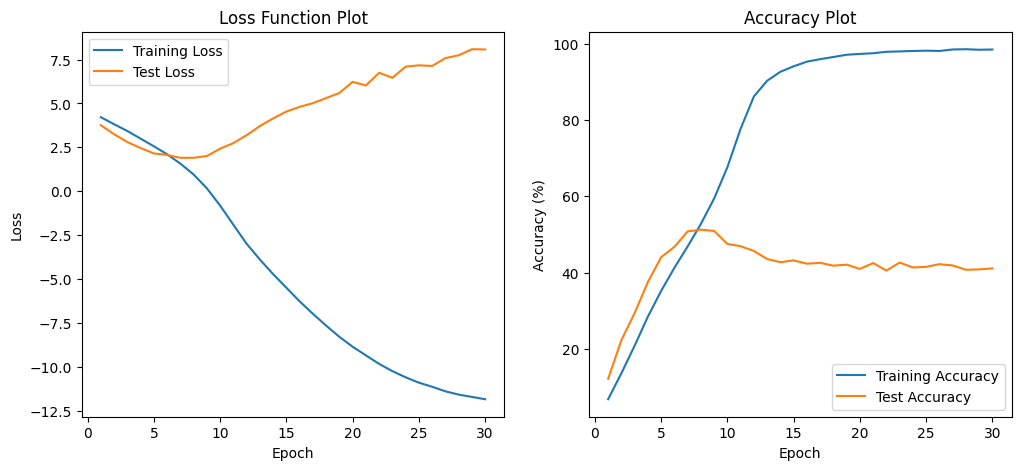

In [25]:
# Plot the loss function and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Function Plot')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Plot')
plt.legend()

plt.show()